In [3]:
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Hypothesis testing

Hypothesis testing is a method for comparing propositions about a population in a quantitative way. For example, maybe I tell you that the mean income in New York City is \$50k/yr, but you think it's higher than that. I challenge you to prove it -- how do you do it? First you get some data; you sample some New Yorkers find that the mean of your sample is \$54k/yr, a difference of \$4k/yr from my origin claim. Is \$4k/yr a significant difference? Maybe it depends on who you ask, but statistics has an answer for us.

In [76]:
pop = stats.norm(loc=50000, scale=10000)
sample = pop.rvs(size=30)
while np.mean(sample) < 54000:
    sample = pop.rvs(size=30)

DescribeResult(nobs=30, minmax=(34381.751758053404, 78979.196009317719), mean=54566.801540194741, variance=114686745.40211229, skewness=-0.18498530671064242, kurtosis=-0.4326272567663909)

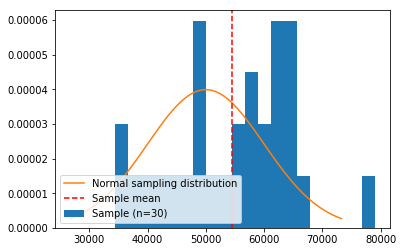

In [130]:
plt.hist(sample, bins=20, normed=True)
x = np.linspace(pop.ppf(0.01), pop.ppf(0.99), 100)
plt.plot(x, pop.pdf(x))
plt.axvline(sample.mean(), color='r', linestyle='--')
plt.legend(['Normal sampling distribution', 'Sample mean', 'Sample (n=30)'], loc=3)
stats.describe(sample)

### Standard Error of the Mean

Say there are 10 New Yorkers in your sample. What if you had picked 10 different New Yorkers? Probably you would find a different mean salary. If you took many samples and plotted a distribution fot he mean incomes from each one, the central limit theorem tells us that you would end up with a normal distribution of means with some standard deviation.

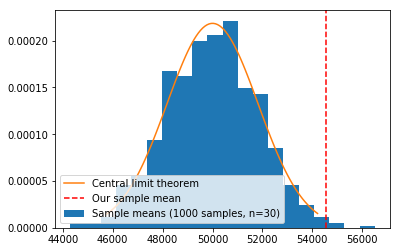

In [113]:
means = np.array([pop.rvs(size=30).mean() for i in range(1000)])
plt.hist(means, bins=20, normed=True)
x = np.linspace(stats.norm.ppf(0.01, loc=means.mean(), scale=means.std()), stats.norm.ppf(0.99, loc=means.mean(), scale=means.std()), 100)
plt.plot(x, stats.norm.pdf(x, loc=pop.mean(), scale=pop.std() / np.sqrt(30)))
plt.axvline(sample.mean(), color='r', linestyle='--')
plt.legend(['Central limit theorem', 'Our sample mean', 'Sample means (1000 samples, n=30)'], loc=3)

We call this standard deviation the "standard error of the mean." The standard error of the mean tells us how large of a difference we might _expect_ to see every time we take a new sample. Therefore we might call the difference between our sample mean and our initial (or null) hypothesis significant if it is large compared to the standard error of the mean. If in our example the standard error of the mean is \$10k, then a difference of \$5k is not very large, but if the standard error is only \$1k, then \$5k is quite large.

How do we calculate the standard error? We could estimate it by taking several samples and calculating their standard deviation. However, intuitively it shouldn't matter if we take 10 samples of 10 individual each or 2 samples of 50 individuals; we should arrive at the same measure of how accurately we have estimated the mean no matter how we divide up our data. We can actually calculate the standard error in the mean using only one sample. $$SE = \frac{s}{\sqrt{n}}$$ where $$s^2 = \frac{1}{n-1}\sum_i(X_i - \bar{X})^2$$

As we would intuit, as the sample size increases, our standard error goes down.

### z-scores & p-values

So now we know our sample mean is only one half of a standard error from our null hypothesis. Or it's five standard errors from our null hypothesis. We can say qualitatively that a deviation half of what's typical is small, or a deviation five times what's typical is large, but can we make this quantitative? Ideally we would bring this back to the language of probabilities, and by making some assumptions, that's exactly what we can do.

We assume the null hypothesis is true (i.e. the mean income in New York is \$50 k/yr) and that the standard deviation of the population, $\sigma$, is equal to the sample standard deviation, s. Then the sample means would be normally distributed around the population mean with a standard deviation of $s / \sqrt{n}$. We can calculate our sample's z-score: $$z^* = \frac{\bar{X} - \mu_0}{s/ \sqrt{n}}$$

Based on this z-score, we can calculate the probability of observing this sample, given a population with our assumed mean and standard deviation. We take the integral of the normal distribution from $-\infty$ to $z^*$

p-value: 0.00875964251407


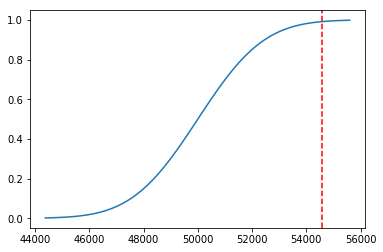

In [126]:
x = np.linspace(stats.norm.ppf(0.001, loc=means.mean(), scale=means.std()), stats.norm.ppf(0.999, loc=means.mean(), scale=means.std()), 100)
plt.plot(x, stats.norm.cdf(x, loc=pop.mean(), scale=sample.std() / np.sqrt(30)))
plt.axvline(sample.mean(), color='r', linestyle='--')
print('p-value: ' + str(1 - stats.norm.cdf(sample.mean(), loc=pop.mean(), scale=sample.std() / np.sqrt(30))))

You can see from the cumulative distribution function of the normal distribution that almost all the data lies below our sample mean, so it's very unlikely that we happened to observe this sample by random chance alone.

So what? Well, if we are confident that this isn't due to a sampling error (e.g. we failed to make a representative sample), then we reject the null hypothesis, and accept the claim that the mean income of New Yorkers is higher than \$50k / yr.

In this case, we actually made a sampling error! I kept generating samples until I got one with a high mean income!

### Errors

Sometimes, whether due to poor experimental design or just by chance, we make the wrong decision when performing a hypothesis test. We reject a null hypothesis that's actually true (Type 1 error) or failing to accept an alternative hypothesis that's actually true (Type 2 error). This is similar to a false positive or false negative.

The probability of making a Type 1 error is called $\alpha$. It is equal to the p-value at which you choose to reject the null hypothesis. Typical values are $p=0.05$ or $p=0.01$.

The probability of making a Type 2 error is called $\beta$. It depends on the particulars of your null hypothesis -- given an alternate population distribution, how much of the probability lies below your threshold for rejecting the null hypothesis? With an alternate hypothesis like "the mean annual income of New Yorkers is higher than \$50k," $\beta = 1 - \alpha$ because we only propose that the mean income is higher, even if only infinitesimally. However, with an alternate hypothesis like "the mean annual income of New Yorkers is \$54k," we can calculate $\beta$ as the integral of a normal distribution with a mean of \$54k and the same standard deviation from $-\infty$ to our critical threshold.

Let's see an example with $\alpha = 0.05$ and an alternative hypothesis mean of \$54k.

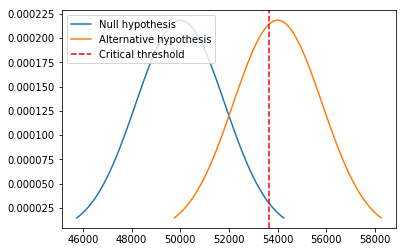

In [143]:
null = stats.norm(loc=pop.mean(), scale=pop.std() / np.sqrt(30))
alt = stats.norm(loc=54000, scale=null.std())
x0 = np.linspace(null.ppf(.01), null.ppf(.99), 100)
plt.plot(x0, null.pdf(x0))
x1 = np.linspace(alt.ppf(.01), alt.ppf(.99), 100)
plt.plot(x1, alt.pdf(x1))
plt.axvline(null.mean() + 2*null.std(), color='r', linestyle='--')
plt.legend(['Null hypothesis', 'Alternative hypothesis', 'Critical threshold'], loc=2)

You can see that it's easy to make Type 2 errors when an alternative hypothesis is not strongly different from a null hypothesis. We'll revisit this with the idea of "likelihood ratios" in Bayesian inference.

### Statistics of small samples

Looking back at the sample in the beginning of the notebook, the histogram doesn't look very normal. There's only 30 samples, and the distribution looks uneven and rough. It's not clear that assuming the standard deviation from such a sample is the same as the standard deviation as the sampled population is a good assumption. Student's t-distribution addresses this issue. The formula given earlier as the z-score is actually a t-statistic, which approximates the z-score in the case of a large sample size. However, for small sample sizes, it is more appropriate to treat it as a t-score and use the t-distribution to calculate the p-value.

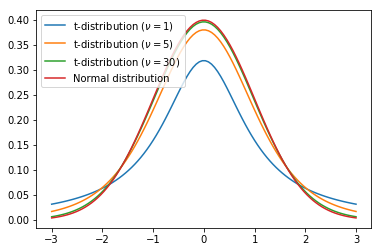

In [10]:
x=np.linspace(-3, 3, 100)
plt.plot(x, stats.t.pdf(x, 1))
plt.plot(x, stats.t.pdf(x, 5))
plt.plot(x, stats.t.pdf(x, 30))
plt.plot(x, stats.norm.pdf(x))
plt.legend([r't-distribution ($\nu=1$)', r't-distribution ($\nu=5$)', r't-distribution ($\nu=30$)', 'Normal distribution'], loc=2)

One can see as the degrees of freedom grows, the t-distribution approaches a normal distribution, but at small degrees of freedom much more probability resides in the tails of the distribution. Below is a comparison of p-values at a t-statistic of 2.

In [13]:
print('p-value (dof=1): ' + str(stats.t.cdf(-2,1)))
print('p-value (dof=5): ' + str(stats.t.cdf(-2,5)))
print('p-value (dof=30): ' + str(stats.t.cdf(-2,30)))
print('p-value (normal): ' + str(stats.norm.cdf(-2)))

p-value (dof=1): 0.14758361765
p-value (dof=5): 0.0509697394149
p-value (dof=30): 0.0273125224815
p-value (normal): 0.0227501319482
